In [ ]:
from lvmtipo.actors import lvm

telescope_subsystem_name = "sci"
tss = await lvm.from_string(telescope_subsystem_name).start()

await tss.foc.moveAbsolute(42)
await tss.pwi.status()

In [ ]:
%matplotlib inline
from plotimg import plot_images, fits

from lvmtipo.actors import lvm
from lvmagp.focus import Focus
from logging import DEBUG, INFO

focus = Focus(tss, level = DEBUG)

await tss.pwi.status()

def img_cb(img_e, img_w):
   plot_images(img_e.data, img_w.data)

f_cal, f_err = await focus.fine(guess=44, count=2, step=4, exposure_time=10, callback=img_cb)

print(f"focus: {f_cal}, err: {f_err}")


In [ ]:
from plotimg import plot_images, fits

await tss.foc.moveAbsolute(f_cal)
ef, wf = (await tss.agc.expose(5)).flatten().unpack("east.filename", "west.filename") 
plot_images(fits.getdata(ef, ext=0), fits.getdata(wf, ext=0))

east: /data/lvm/spec/agcam/east/20220929/lvm.spec.agcam.east_00000002.fits


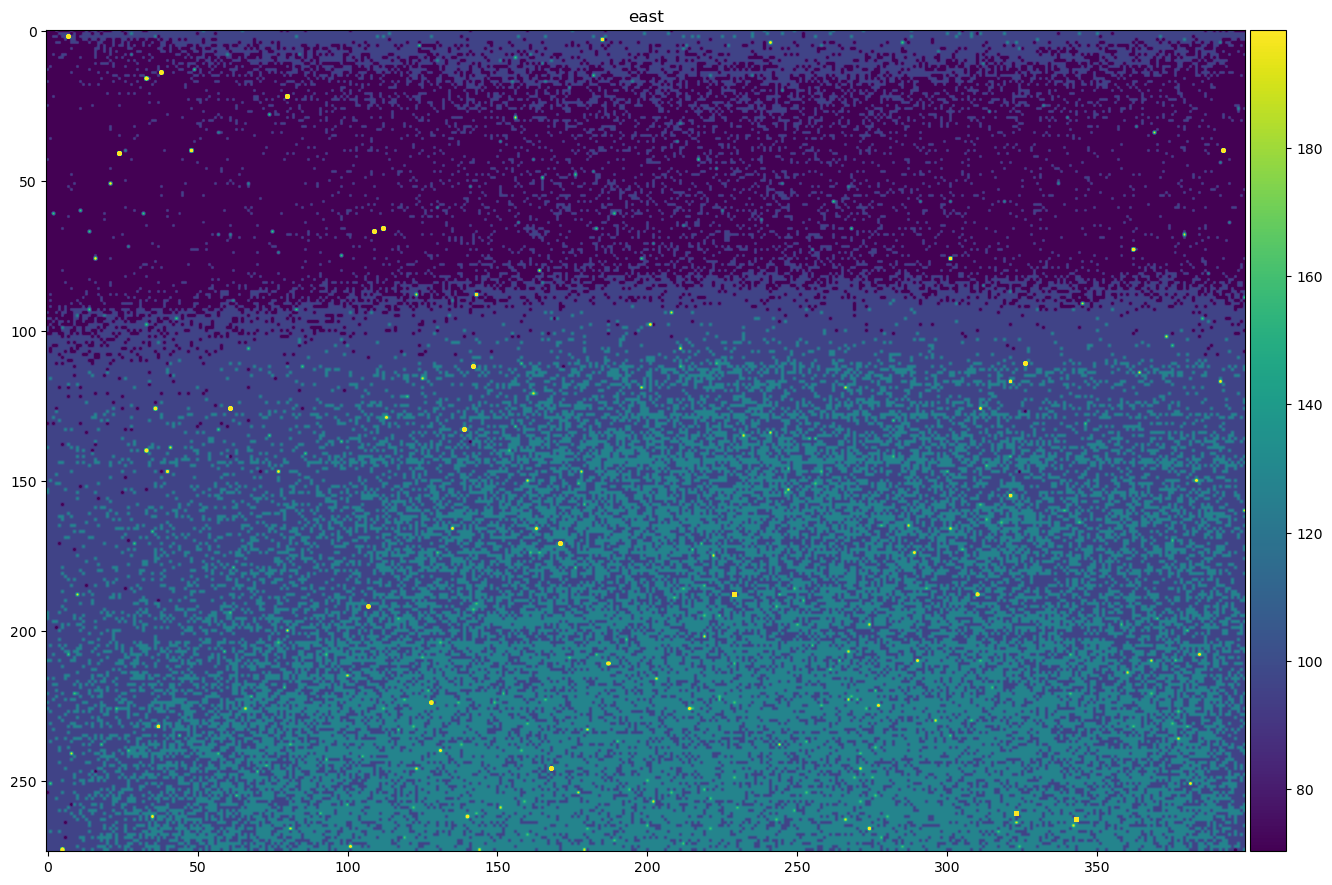

In [11]:
%matplotlib inline
from lvmtipo.actors import lvm
from plotimg import plot_image, fits

await lvm.spec.agc.start()

ef = (await lvm.spec.agc.expose(1.0)).flatten().unpack("east.filename") 
print(f"east: {ef}")
plot_image(fits.getdata(ef, ext=0))

In [ ]:

from lvmagp.images import Image
from lvmagp.images.processors.detection import DaophotSourceDetection, SepSourceDetection
from lvmagp.images.processors.astrometry import AstrometryDotNet

source_detection = SepSourceDetection()

rc = await tss.agc.expose(5)
print(rc)
ef, wf = rc.flatten().unpack("*.filename")
print(f"east: {ef}, west: {wf}")
ei = await source_detection(Image.from_file(ef))
wi = await source_detection(Image.from_file(wf))

ei.catalog


